In [98]:
% cd drive/MyDrive/ML/Datasets/

[Errno 2] No such file or directory: 'drive/MyDrive/ML/Datasets/'
/content/drive/MyDrive/ML/Datasets


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [100]:

df=pd.read_csv("city_day.csv").dropna()
X = df.iloc[:,[4,14]].values
df



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [101]:
X

array([[  1.44, 184.  ],
       [  1.26, 197.  ],
       [  6.6 , 198.  ],
       ...,
       [  3.42,  70.  ],
       [  3.45,  68.  ],
       [  4.05,  54.  ]])

In [102]:
x=df["NO"].head(300)
y=df["AQI"].head(300)


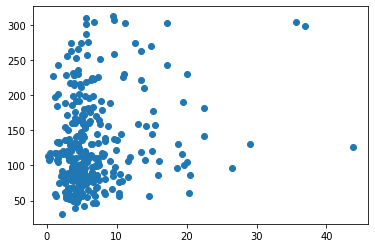

In [103]:

plt.scatter(x, y)
plt.show()

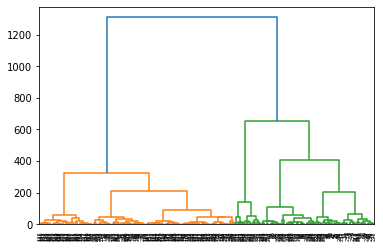

In [104]:
data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

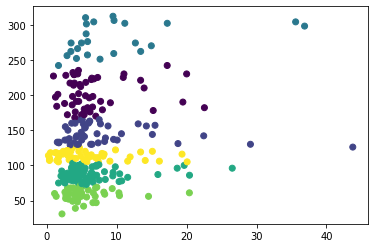

In [105]:

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [106]:
y_hc=hierarchical_cluster.fit_predict(X)
y_hc

array([5, 5, 5, ..., 1, 1, 1])

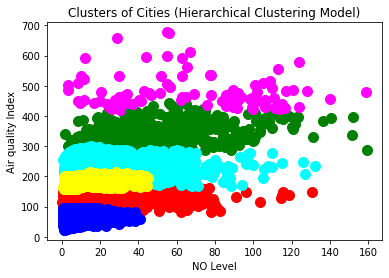

In [107]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_hc==5, 0], X[y_hc==5, 1], s=100, c='yellow', label ='Cluster 6')
plt.title('Clusters of Cities (Hierarchical Clustering Model)')
plt.xlabel('NO Level')
plt.ylabel('Air quality Index')
plt.show()

Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

Bioinformatics: grouping animals according to their biological features to reconstruct phylogeny trees
Business: dividing customers into segments or forming a hierarchy of employees based on salary.
Image processing: grouping handwritten characters in text recognition based on the similarity of the character shapes.
Information Retrieval: categorizing search results based on the query.

**HC VS KMEANS**

K-Means is that it needs us to pre-enter the number of clusters (K) but Hierarchical clustering has no such requirements. The algorithm on itself deduces the optimum number of cluster and displays it form of dendrogram.

Performance of K-Means on spherical data is better than that of HCA
Hierarchical clustering is a purely agglomerative approach and goes on to build one giant cluster. K-Means algorithm in all its iterations has same number of clusters.

K-Means need circular data, while Hierarchical clustering has no such requirement.

K-Means uses median or mean to compute centroid for representing cluster while HCA has various linkage method that may or may not employ the centroid.

With introduction of mini batches K-Means can work with very large datasets but HCA lacks in this regard.

Hierarchical methods are  suited for cases which require arrangement of the clusters  into a natural hierarchy. In K-means all clusters are on same level i.e. similar WCSS or cohesiveness.

HCA can produce reproducible results while older versions of K-Means can’t

K-Means simply divides data into mutually exclusive subsets while HCA arranges it into a tree format.